# [2주차] 머신러닝의 역사: 스스로 특징을 배우는 기계의 등장 🚀

안녕하세요! 2주차 수업에 오신 것을 환영합니다.

지난 시간에는 머신러닝의 기본적인 종류와 '선형 모델'을 배웠습니다.

오늘은 여기서 한 걸음 더 나아가,
> **"왜 현대 머신러닝은 '딥러닝(Deep Learning)'이 주류가 되었을까?"**

라는 질문에 대한 답을 찾아 과거로의 시간 여행을 떠나보겠습니다.

오늘의 목표는 각 시대의 한계를 뛰어넘은 핵심 아이디어들을 이해하고,

딥러닝의 필요성을 자연스럽게 체감하는 것입니다.

## ⛰️ 모듈 1: 전통 머신러닝의 '한계'

- **상황**: 우리가 숫자 '7'과 '1'을 구분하는 모델을 만든다고 상상해봅시다.
- **질문**: 모델이 '7'과 '1'을 잘 구분하려면, 우리는 모델에게
> ***무엇을 알려줘야 할까요?***
- **전통적인 접근**: 데이터의 특징(Feature)을  **사람이 직접** 정의해서 모델에게 알려줍니다.
  - "숫자 '7'은 가로획이 있다."
  - "숫자 '1'은 수직선이 길다."
  - "이미지 중앙에 픽셀이 얼마나 밀집해 있는가?"
- **한계**
  - **전문 지식 요구**: 해당 분야(도메인)의 전문가가 아니면 좋은 특징을 만들기 어렵습니다.
  - **엄청난 노력**: 데이터가 복잡해질수록 사람이 모든 특징을 고려하는 것은 거의 불가능합니다.
    * (예: 개와 고양이 사진 구분)
  - **성능의 한계**: 모델의 성능이 모든 문제에 일반화되기 어렵습니다.

그렇다면,

> 기계가 데이터로부터 좋은 특징까지 '**알아서 스스로**' 학습하게 할 수는 없을까?

이 질문이 바로 **딥러닝** 출발점 입니다.

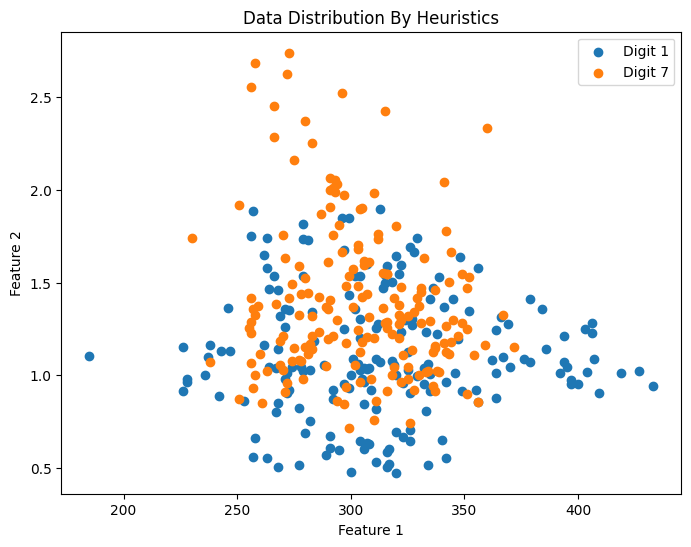

두 특징으로 어느정도 구분이 되는 것 같지만, 겹치는 부분이 많아 보입니다.


In [4]:
# 라이브러리 임포트
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits

# 불필요한 경고문구 숨기기
import warnings
warnings.filterwarnings(action='ignore')

# 사이킷런에 내장된 숫자 이미지 데이터 로드 (0~9)
digits = load_digits()

# 숫자 '1'과 '7' 데이터만 필터링
X = digits.data[(digits.target == 1) | (digits.target == 7)]
y = digits.target[(digits.target == 1) | (digits.target == 7)]
y[y == 1] = 0  # 숫자 1을 0번 클래스로
y[y == 7] = 1  # 숫자 7을 1번 클래스로

# 특징 공학: 사람이 직접 두 가지 특징을 정의합니다.
# 특징 1: 이미지의 총 픽셀 합 (밝기)
feature1 = X.sum(axis=1)
# 특징 2: 이미지를 수평으로 반 갈랐을 때, 윗부분과 아랫부분의 픽셀 합 비율
feature2 = X[:, :32].sum(axis=1) / (X[:, 32:].sum(axis=1) + 1e-6)

# 사람이 만든 2개의 특징으로 데이터를 시각화
plt.figure(figsize=(8, 6))
plt.scatter(feature1[y==0], feature2[y==0], label='Digit 1')
plt.scatter(feature1[y==1], feature2[y==1], label='Digit 7')
plt.title("Data Distribution By Heuristics")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.show()
print("두 특징으로 어느정도 구분이 되는 것 같지만, 겹치는 부분이 많아 보입니다.")

In [36]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

# 사람이 만든 특징 데이터
X_features = np.c_[feature1, feature2]

# 연습/시험 데이터 분리
(X_train, X_test,
 y_train, y_test) = train_test_split(X_features, y,
                                     test_size=0.3,
                                     random_state=42)

# 로지스틱 회귀 모델로 학습
model = LogisticRegression()
model.fit(X_train, y_train)

# 결과 확인
accuracy = model.score(X_test, y_test)
print(f"사람이 만든 특징을 사용한 모델의 정확도: {accuracy * 100:.2f}%")
print("\n나쁘지 않은 성능이지만, 더 좋은 특징을 찾으면 성능이 얼마나 더 오를까요?")
print("\n이처럼 모델의 성능이 '사람의 직관(Heuristics)'에 의존하는 것이,")
print(f"그리고 그 한계가 뚜렷한 것이, 전통적인 머신러닝의 한계였습니다.")

사람이 만든 특징을 사용한 모델의 정확도: 58.72%

나쁘지 않은 성능이지만, 더 좋은 특징을 찾으면 성능이 얼마나 더 오를까요?

이처럼 모델의 성능이 '사람의 직관(Heuristics)'에 의존하는 것이,
그리고 그 한계가 뚜렷한 것이, 전통적인 머신러닝의 한계였습니다.


## ❄️ 모듈 2: 인공신경망의 탄생과 첫 번째 'AI 겨울'

- **퍼셉트론 (Perceptron, 1957)**
  * 뇌의 뉴런(신경세포)에서 영감을 받은 최초의 인공신경망 모델입니다.
  * 여러 개의 입력을 받아 하나의 결과를 출력하는, 1주차에 배운 선형 모델과 거의 동일한 구조였습니다.
- **엄청난 기대**: "이제 기계가 뇌처럼 생각할 수 있다!"는 엄청난 기대를 받았습니다.
- **치명적 한계**: 하지만 퍼셉트론은 **선형적으로 분리되지 않는 문제**는 풀 수 없다는 것이 증명되었습니다.
  * **XOR 문제**: 대표적인 비선형 문제로, 아래 그림처럼 직선 하나로는 두 그룹을 절대 나눌 수 없는 문제입니다.
- **첫 번째 AI 겨울**: 이 한계가 알려지면서, 인공신경망 연구에 대한 지원과 관심이 급격히 식어버린 시기를 의미합니다.

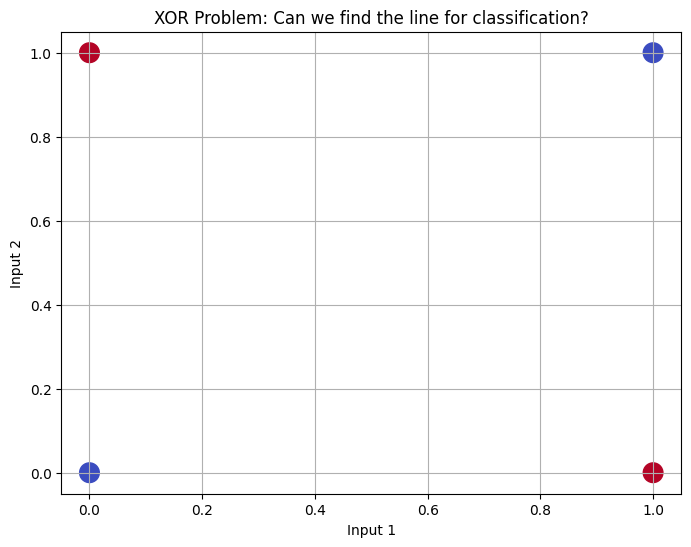

어떤 방향으로 직선을 그어도, 빨간 점과 파란 점을 완벽하게 나눌 수 없습니다.


In [13]:
# XOR 문제 데이터 생성
X_xor = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y_xor = np.array([0, 1, 1, 0]) # 입력이 다르면 1, 같으면 0

# XOR 데이터 시각화
plt.figure(figsize=(8, 6))
plt.scatter(X_xor[:, 0], X_xor[:, 1], c=y_xor, cmap='coolwarm', s=200)
plt.title("XOR Problem: Can we find the line for classification?")
plt.xlabel("Input 1")
plt.ylabel("Input 2")
plt.grid(True)
plt.show()
print("어떤 방향으로 직선을 그어도, 빨간 점과 파란 점을 완벽하게 나눌 수 없습니다.")

In [17]:
# 1주차에 배운 선형 모델(로지스틱 회귀)로 XOR 문제 풀기 시도
xor_model = LogisticRegression()
xor_model.fit(X_xor, y_xor)

# 결과 확인
accuracy = xor_model.score(X_xor, y_xor)
print(f"선형 모델의 XOR 문제 정확도: {accuracy * 100:.2f}%")
print("\n모델이 '찍기'와 다름없는 성능을 보여줍니다. 이는 선형 모델의 명백한 한계입니다.")

선형 모델의 XOR 문제 정확도: 50.00%

모델이 '찍기'와 다름없는 성능을 보여줍니다. 이는 선형 모델의 명백한 한계입니다.


## 🔥 모듈 3: AI 겨울을 녹인 아이디어들

AI 겨울은 길었지만, 소수의 연구자들은 해결책을 찾기 위해 노력했습니다.

- **해결책**: **"퍼셉트론을 여러 겹 쌓으면(Multi-Layer) 비선형 문제도 풀 수 있다!"**
  - 다층 퍼셉트론(Multi-Layer Perceptron, MLP)
  - 현대 딥러닝(Deep Learning)의 기본 구조가 됩니다.
  - 여러 개의 '선'을 조합하여 '굽은 선'이나 '영역'을 만들어내는 원리입니다.

- **새로운 문제**: 여러 겹의 모델은 너무 복잡해 기존의 방법으로는 학습이 불가능했습니다.
- **돌파구**: 역전파 (Backpropagation, 1986년)
  - 모델의 최종 예측 결과와 실제 정답의 오차(Error)를
  > 뒤에서부터(**Back**) 앞으로 전파(**Propagate**)하면서
  - 각 뉴런의 연결 강도(가중치)를 순차적으로 수정하는 알고리즘입니다.

 드디어 깊은 신경망(Deep Neural Network)을 학습시키는 것이 가능해졌습니다.

In [20]:
from sklearn.neural_network import MLPClassifier

# MLP 모델 생성 (은닉층(hidden layer)을 2개, 뉴런 4개-4개로 구성)
mlp_model = MLPClassifier(hidden_layer_sizes=(4,4,),
                          activation='relu', solver='adam',
                          random_state=42, max_iter=1000)

# MLP 모델로 XOR 데이터 학습
mlp_model.fit(X_xor, y_xor)

# 결과 확인
accuracy = mlp_model.score(X_xor, y_xor)
print(f"MLP 모델의 XOR 문제 정확도: {accuracy * 100:.2f}%")
print("\n여러 개의 선을 조합하는 MLP는 비선형적인 XOR 문제를 완벽하게 해결했습니다!")

MLP 모델의 XOR 문제 정확도: 100.00%

여러 개의 선을 조합하는 MLP는 비선형적인 XOR 문제를 완벽하게 해결했습니다!


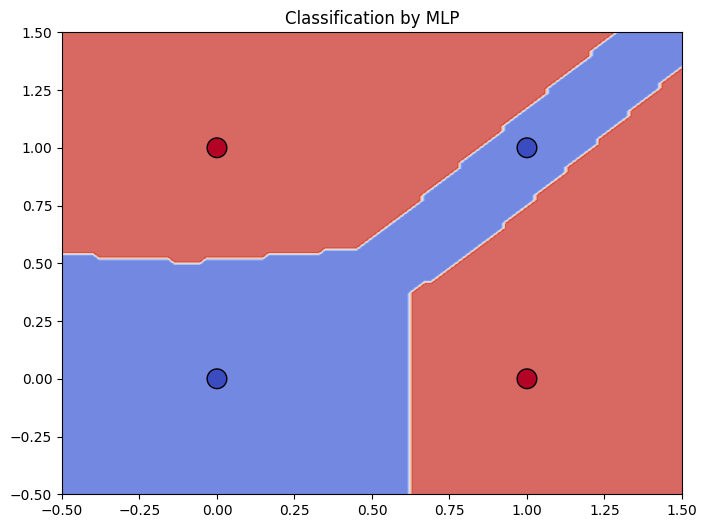

MLP는 그림처럼 직선이 아닌, 복잡한 형태의 경계선을 만들어낼 수 있습니다.


In [22]:
# MLP가 학습한 결정 경계 시각화
plt.figure(figsize=(8, 6))
xx, yy = np.meshgrid(np.linspace(-0.5, 1.5, 100),
                     np.linspace(-0.5, 1.5, 100))
Z = mlp_model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, cmap='coolwarm', alpha=0.8) # 배경색으로 결정 경계 표시
plt.scatter(X_xor[:, 0], X_xor[:, 1],
            c=y_xor, cmap='coolwarm',
            s=200, edgecolors='k')
plt.title("Classification by MLP")
plt.show()
print("MLP는 그림처럼 직선이 아닌, 복잡한 형태의 경계선을 만들어낼 수 있습니다.")

## 💥 모듈 4: 딥러닝의 '빅뱅' (The Big Bang of Deep Learning)

역전파가 발명되었음에도,
> 여전히 딥러닝은 **현실 문제를 풀지 못했고**,

주류가 되지 못했습니다.

그 당시에는 아무도 이유를 몰랐지만,

나중에서야 밝혀진 이유는 대표적으로 다음 두 가지였습니다.
1.  **느린 컴퓨터 성능 (CPU)**
2.  **부족한 학습 데이터**

이 모든 것을 일깨워준 결정적 사건이, 2012년에 일어납니다.

- **ImageNet** 대회
  * 100만 장이 넘는 이미지들을 1000개의 카테고리로 분류하는,
  * 당시 가장 크고 어려운 이미지 인식 대회였습니다.
- 알렉스넷(**AlexNet**)의 등장 (2012, 제프리 힌튼 교수팀)
  - Convolutional Neural Network(**CNN**)을 단위로 하는 모델입니다.
  - **GPU를 활용한 병렬 처리**로 학습 속도를 획기적으로 높였습니다.
  - 압도적인 성능으로 우승하며 전 세계에 충격을 주었습니다.
- **패러다임의 전환**
  - 이 사건을 계기로 머신러닝 연구의 패러다임이,
  > 사람이 특징을 만들던 **특징 공학**에서, 모델이 스스로 특징을 학습하는 **딥러닝**으로,
  - 완전히 전환되며 딥러닝의 시대가 본격적으로 시작된 것입니다.

In [29]:
# 모듈 1의 숫자 '1'과 '7' 구분 문제를 이번엔 딥러닝(MLP)으로 풀어봅시다.
# 이번에는 사람이 만든 특징(feature1, feature2)을 사용하지 않습니다.
# 원본 이미지의 64개 픽셀 데이터 전체(X)를 그대로 사용합니다.
# 문제가 쉬운 관계로, 굳이 CNN까지 사용하지는 않습니다.

# 연습/시험 데이터 분리
(X_train_orig,
 X_test_orig,
 y_train_orig,
 y_test_orig) = train_test_split(X, y, test_size=0.3, random_state=42)

# 더 깊은 MLP 모델 생성
deep_model = MLPClassifier(hidden_layer_sizes=(100, 50),
                           random_state=42, max_iter=500)

# 원본 픽셀 데이터로 직접 학습
deep_model.fit(X_train_orig, y_train_orig)

# 결과 확인
accuracy = deep_model.score(X_test_orig, y_test_orig)
print("모듈 1에서 사용했던 데이터와 동일한 데이터입니다.")
print(f"모듈 1에서 사람이 만든 특징 기반 모델의 정확도: 58.72%")
print(f"딥러닝 모델(MLP)의 정확도: {accuracy * 100:.2f}%")
print("\n✨ 결과: 딥러닝 모델은 64개 픽셀의 복잡한 관계 속에서 '스스로' 최적의 특징을 학습하여,")
print(f"사람이 만든 특징보다 더 높은 성능을 보여줍니다!")

모듈 1에서 사용했던 데이터와 동일한 데이터입니다.
모듈 1에서 사람이 만든 특징 기반 모델의 정확도: 58.72%
딥러닝 모델(MLP)의 정확도: 100.00%

✨ 결과: 딥러닝 모델은 64개 픽셀의 복잡한 관계 속에서 '스스로' 최적의 특징을 학습하여,
사람이 만든 특징보다 더 높은 성능을 보여줍니다!
